In [1]:
!pip install xlrd openpyxl

You should consider upgrading via the '/Users/inoccu/.anyenv/envs/pyenv/versions/3.10.2/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

df1 = pd.read_excel('online_retail_II.xlsx', sheet_name=0, index_col=0)
df1.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Invoice,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name=1, index_col=0)
df2.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Invoice,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
df = pd.concat([df1, df2])
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Invoice,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [35]:
df.shape

(1067371, 7)

In [36]:
df.duplicated().sum()

35122

In [37]:
df = df.drop_duplicates()
df.shape

(1032249, 7)

In [38]:
df = df[df['Country'] == 'United Kingdom']
df = df[['StockCode', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID']]

In [39]:
df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,Price,Customer ID
count,947535.000000,947535,947535.000000,716064.000000
mean,8.995641,2011-01-02 01:27:36.943501056,4.492272,15545.370457
min,-80995.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-07-01 14:43:00,1.250000,14191.000000
50%,3.000000,2010-12-08 09:20:00,2.100000,15544.000000
75%,10.000000,2011-07-25 17:09:00,4.150000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,175.034006,NaN,125.593869,1592.783124


In [40]:
df.to_csv('online_retail_II_uk_all.csv')

In [10]:
import datetime

df2010 = df[(df['InvoiceDate'] >= datetime.datetime(2010, 1, 1)) & (df['InvoiceDate'] < datetime.datetime(2011, 1, 1))]
df2010.head()

,StockCode,Quantity,InvoiceDate,Price,Customer ID
Invoice,,,,,
493410,TEST001,5,2010-01-04 09:24:00,4.50,12346.0
C493411,21539,-1,2010-01-04 09:43:00,4.25,14590.0
493412,TEST001,5,2010-01-04 09:53:00,4.50,12346.0
493413,21724,1,2010-01-04 09:54:00,0.85,NaN
493413,84578,1,2010-01-04 09:54:00,3.75,NaN


In [11]:
df2010.to_csv('online_retail_II_uk_2010.csv')

In [12]:
df = pd.read_csv('online_retail_II_uk_2010.csv', parse_dates=['InvoiceDate'], index_col=['InvoiceDate'])

df.head()

,Invoice,StockCode,Quantity,Price,Customer ID
InvoiceDate,,,,,
2010-01-04 09:24:00,493410,TEST001,5,4.50,12346.0
2010-01-04 09:43:00,C493411,21539,-1,4.25,14590.0
2010-01-04 09:53:00,493412,TEST001,5,4.50,12346.0
2010-01-04 09:54:00,493413,21724,1,0.85,NaN
2010-01-04 09:54:00,493413,84578,1,3.75,NaN


In [13]:
df['Subtotal'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Subtotal
InvoiceDate,,,,,,
2010-01-04 09:24:00,493410,TEST001,5,4.50,12346.0,22.50
2010-01-04 09:43:00,C493411,21539,-1,4.25,14590.0,-4.25
2010-01-04 09:53:00,493412,TEST001,5,4.50,12346.0,22.50
2010-01-04 09:54:00,493413,21724,1,0.85,NaN,0.85
2010-01-04 09:54:00,493413,84578,1,3.75,NaN,3.75


In [14]:
df = df[df['Invoice'].str.startswith('C') == False]
df.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Subtotal
InvoiceDate,,,,,,
2010-01-04 09:24:00,493410,TEST001,5,4.50,12346.0,22.50
2010-01-04 09:53:00,493412,TEST001,5,4.50,12346.0,22.50
2010-01-04 09:54:00,493413,21724,1,0.85,NaN,0.85
2010-01-04 09:54:00,493413,84578,1,3.75,NaN,3.75
2010-01-04 09:54:00,493413,21723,1,0.85,NaN,0.85


In [15]:
df.isnull().sum()

Invoice             0
StockCode           0
Quantity            0
Price               0
Customer ID    100248
Subtotal            0
dtype: int64

In [16]:
df = df.dropna()
df.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Subtotal
InvoiceDate,,,,,,
2010-01-04 09:24:00,493410,TEST001,5,4.50,12346.0,22.5
2010-01-04 09:53:00,493412,TEST001,5,4.50,12346.0,22.5
2010-01-04 10:28:00,493414,21844,36,2.55,14590.0,91.8
2010-01-04 10:28:00,493414,21533,12,4.25,14590.0,51.0
2010-01-04 10:28:00,493414,37508,2,2.55,14590.0,5.1


In [17]:
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekday'] = df.index.weekday
df['Hour'] = df.index.hour
df.head()

,Invoice,StockCode,Quantity,Price,Customer ID,Subtotal,Month,Day,Weekday,Hour
InvoiceDate,,,,,,,,,,
2010-01-04 09:24:00,493410,TEST001,5,4.50,12346.0,22.5,1,4,0,9
2010-01-04 09:53:00,493412,TEST001,5,4.50,12346.0,22.5,1,4,0,9
2010-01-04 10:28:00,493414,21844,36,2.55,14590.0,91.8,1,4,0,10
2010-01-04 10:28:00,493414,21533,12,4.25,14590.0,51.0,1,4,0,10
2010-01-04 10:28:00,493414,37508,2,2.55,14590.0,5.1,1,4,0,10


In [18]:
df = df.set_index(['Month', 'Day', 'Weekday', 'Hour'])
df.head()

Invoice StockCode  Quantity  Price  Customer ID  \
Month Day Weekday Hour                                                   
1     4   0       9     493410   TEST001         5   4.50      12346.0   
                  9     493412   TEST001         5   4.50      12346.0   
                  10    493414     21844        36   2.55      14590.0   
                  10    493414     21533        12   4.25      14590.0   
                  10    493414     37508         2   2.55      14590.0   

                        Subtotal  
Month Day Weekday Hour            
1     4   0       9         22.5  
                  9         22.5  
                  10        91.8  
                  10        51.0  
                  10         5.1

In [19]:
pd.set_option('display.max_columns', 100)
df.groupby(['Month']).describe()

Quantity                                                         Price  \
         count       mean         std  min  25%  50%   75%      max    count   
Month                                                                          
1      19255.0  12.264555   36.970832  1.0  2.0  5.0  12.0   1440.0  19255.0   
2      21019.0  11.141491   31.428172  1.0  2.0  4.0  12.0   1800.0  21019.0   
3      29254.0  13.127777  123.539057  1.0  2.0  4.0  12.0  10000.0  29254.0   
4      24442.0  11.869119   34.085811  1.0  2.0  5.0  12.0   1440.0  24442.0   
5      25397.0  12.873883   67.746256  1.0  2.0  4.0  12.0   5000.0  25397.0   
6      27940.0  11.864853   46.136824  1.0  2.0  4.0  12.0   3500.0  27940.0   
7      24099.0  11.610440   29.199365  1.0  2.0  5.0  12.0    960.0  24099.0   
8      23722.0  13.208330   41.804472  1.0  2.0  6.0  12.0   2304.0  23722.0   
9      30136.0  15.913127  120.242124  1.0  2.0  6.0  12.0   7128.0  30136.0   
10     43952.0  11.452312   50.684917  1.0  2.0  4.0  12.0   4752.0  43952.0   
11     53844.0  10.257057   64.263052  1.0  2.0  4.0  10.0   9360.0  53844.0   
12     23458.0  11.363671   45.403028  1.0  2.0  4.0  12.0   2880.0  23458.0   

                                                             Customer ID  \
           mean        std   min   25%   50%   75%       max       count   
Month                                                                      
1      3.554156  64.965968  0.00  1.25  1.95  3.75   8985.60     19255.0   
2      3.049111   3.557626  0.00  1.25  1.95  3.75    102.84     21019.0   
3      3.406310  64.183058  0.00  1.25  1.95  3.75  10953.50     29254.0   
4      3.128565   3.651605  0.00  1.25  1.95  3.75    125.00     24442.0   
5      3.101099   3.587745  0.06  1.25  1.95  3.75    125.00     25397.0   
6      3.213182   9.308826  0.00  1.25  1.95  3.75   1000.63     27940.0   
7      3.155539   7.621539  0.00  1.25  1.95  3.75    295.00     24099.0   
8      3.031611  10.094839  0.06  1.25  1.69  2.95    800.00     23722.0   
9      3.344414  63.104270  0.00  1.25  1.95  2.95  10468.80     30136.0   
10     3.076251  18.046575  0.00  1.25  1.95  3.75   2667.88     43952.0   
11     2.971507   4.118344  0.00  1.25  1.95  3.75    295.00     53844.0   
12     3.098223   5.176805  0.00  1.25  2.10  3.75    295.00     23458.0   

                                                                               \
               mean          std      min      25%      50%      75%      max   
Month                                                                           
1      15456.505167  1606.691570  12346.0  14081.0  15311.0  16875.0  18268.0   
2      15360.739474  1572.419463  12747.0  14040.0  15272.0  16788.0  18285.0   
3      15566.535072  1611.041078  12346.0  14167.0  15665.0  16984.0  18283.0   
4      15498.932861  1597.513324  12747.0  14134.0  15489.0  16883.0  18276.0   
5      15506.625271  1619.776142  12745.0  14101.0  15488.0  16945.0  18287.0   
6      15579.595812  1588.429602  12346.0  14227.0  15716.0  16960.0  18272.0   
7      15554.135483  1633.706494  12748.0  14159.0  15547.0  17068.0  18279.0   
8      15566.893179  1584.254392  12745.0  14221.0  15615.0  16919.0  18286.0   
9      15558.563081  1614.158965  12748.0  14161.0  15636.0  17001.0  18287.0   
10     15497.486963  1515.259464  12608.0  14216.0  15579.0  16772.0  18284.0   
11     15676.128687  1583.822086  12747.0  14415.0  15850.0  17049.0  18287.0   
12     15739.713914  1622.013924  12747.0  14506.0  15805.0  17223.0  18269.0   

      Subtotal                                                             
         count       mean         std   min   25%    50%    75%       max  
Month                                                                      
1      19255.0  21.559102   87.942502  0.00  5.04  10.98  17.88   8985.60  
2      21019.0  19.471232   44.162212  0.00  4.95  10.50  17.70   1206.50  
3      29254.0  20.071304   85.572958  0.00  4.95  10.50  17.85  109

In [20]:
df_month_subtotal = df[['Subtotal']].groupby(['Month']).sum()
df_month_subtotal

,Subtotal
Month,
1,415120.502
2,409265.826
3,587165.941
4,500727.401
5,501360.660
6,538672.610
7,502317.300
8,506470.040
9,679069.921


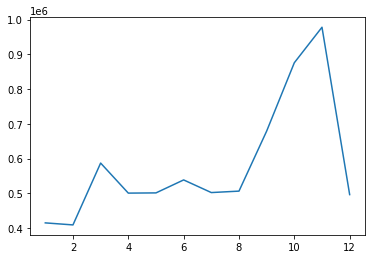

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(df_month_subtotal)

In [22]:
by_item = df[['StockCode', 'Subtotal']].groupby(['StockCode']).sum()
by_item

,Subtotal
StockCode,
10002,4517.070
10080,6.800
10120,70.140
10123C,107.440
10123G,90.940
...,...
M,52086.840
PADS,0.013
POST,532.280


In [23]:
by_item = by_item.sort_values(['Subtotal'], ascending=False)
by_item

,Subtotal
StockCode,
22423,130965.750
85123A,127327.550
85099B,71486.250
84879,59528.750
M,52086.840
...,...
84205C,0.380
72708,0.210
84206C,0.190


In [24]:
by_item_30 = by_item.values[0:30,0]
print(by_item_30)

[130965.75 127327.55  71486.25  59528.75  52086.84  40049.9   37399.8
  32501.46  31697.74  31668.4   30880.8   30190.4   28945.54  27527.28
  27496.05  26743.97  26681.1   26656.32  26598.58  26407.95  26198.28
  25384.15  25174.85  24610.05  24458.4   23994.93  23814.76  23502.6
  22887.05  22887.01]


In [25]:
by_item_30_label = by_item.index[0:30].values
print(by_item_30_label)

['22423' '85123A' '85099B' '84879' 'M' '48138' '84347' '21621' '21843'
 '47566' '85099F' '22086' '21623' '21137' '22386' '22189' '85099C' '20685'
 '79321' '15056N' '82484' '21754' '20725' '21232' '20914' '22470' '21733'
 '22411' '21931' '48194']


([<matplotlib.patches.Wedge at 0x1272ba710>,
 [Text(0.3898303310197901, 1.0286069769435753, '22423'),
  Text(0.9684505515532945, 0.52163543705937, '85123A'),
  Text(1.0982839147992909, -0.06142021241533058, '85099B'),
  Text(1.00517462585349, -0.4467929851064101, '84879'),
  Text(0.8218862828294103, -0.7310970784354528, 'M'),
  Text(0.6110228019926293, -0.9146863590570685, '48138'),
  Text(0.4025943784732264, -1.0236785464303513, '84347'),
  Text(0.19839175262455291, -1.0819615115569308, '21621'),
  Text(0.004144574626543629, -1.0999921920182731, '21843'),
  Text(-0.18773589831043583, -1.0838612607181668, '47566'),
  Text(-0.37152485984572897, -1.035359492406677, '85099F'),
  Text(-0.5403073294377366, -0.9581586454005732, '22086'),
  Text(-0.689128028202207, -0.8573812225294757, '21623'),
  Text(-0.8141238533512447, -0.7397312697219992, '21137'),
  Text(-0.9168650990718905, -0.6077486241069514, '22386'),
  Text(-0.9974056973839908, -0.4638770039848441, '22189'),
  Text(-1.0548364022170

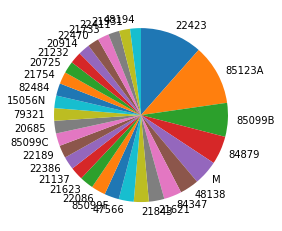

In [26]:
plt.pie(x=by_item_30, labels=by_item_30_label, startangle=90, counterclock=False)

([<matplotlib.patches.Wedge at 0x127353f40>,
 [Text(0.3898303310197901, 1.0286069769435753, '22423'),
  Text(0.9684505515532945, 0.52163543705937, '85123A'),
  Text(1.0982839147992909, -0.06142021241533058, '85099B'),
  Text(1.00517462585349, -0.4467929851064101, '84879'),
  Text(0.8218862828294103, -0.7310970784354528, 'M'),
  Text(0.6110228019926293, -0.9146863590570685, '48138'),
  Text(0.4025943784732264, -1.0236785464303513, '84347'),
  Text(0.19839175262455291, -1.0819615115569308, '21621'),
  Text(0.004144574626543629, -1.0999921920182731, '21843'),
  Text(-0.18773589831043583, -1.0838612607181668, '47566'),
  Text(-0.37152485984572897, -1.035359492406677, '85099F'),
  Text(-0.5403073294377366, -0.9581586454005732, '22086'),
  Text(-0.689128028202207, -0.8573812225294757, '21623'),
  Text(-0.8141238533512447, -0.7397312697219992, '21137'),
  Text(-0.9168650990718905, -0.6077486241069514, '22386'),
  Text(-0.9974056973839908, -0.4638770039848441, '22189'),
  Text(-1.0548364022170

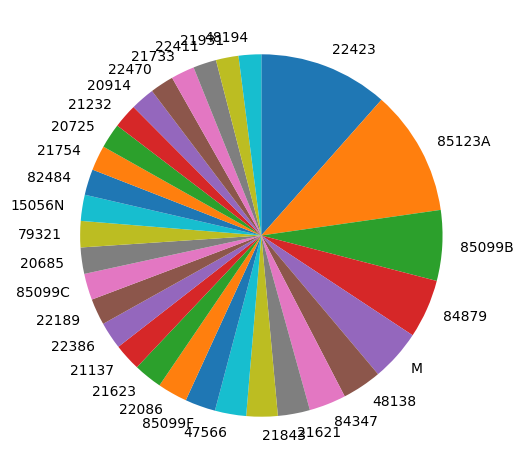

In [27]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.pie(x=by_item_30, labels=by_item_30_label, startangle=90, counterclock=False)

([<matplotlib.patches.Wedge at 0x12742b5e0>,
 [Text(0.3898303310197901, 1.0286069769435753, '22423'),
  Text(0.9684505515532945, 0.52163543705937, '85123A'),
  Text(1.0982839147992909, -0.06142021241533058, '85099B'),
  Text(1.00517462585349, -0.4467929851064101, '84879'),
  Text(0.8218862828294103, -0.7310970784354528, 'M'),
  Text(0.6110228019926293, -0.9146863590570685, '48138'),
  Text(0.4025943784732264, -1.0236785464303513, '84347'),
  Text(0.19839175262455291, -1.0819615115569308, '21621'),
  Text(0.004144574626543629, -1.0999921920182731, '21843'),
  Text(-0.18773589831043583, -1.0838612607181668, '47566'),
  Text(-0.37152485984572897, -1.035359492406677, '85099F'),
  Text(-0.5403073294377366, -0.9581586454005732, '22086'),
  Text(-0.689128028202207, -0.8573812225294757, '21623'),
  Text(-0.8141238533512447, -0.7397312697219992, '21137'),
  Text(-0.9168650990718905, -0.6077486241069514, '22386'),
  Text(-0.9974056973839908, -0.4638770039848441, '22189'),
  Text(-1.0548364022170

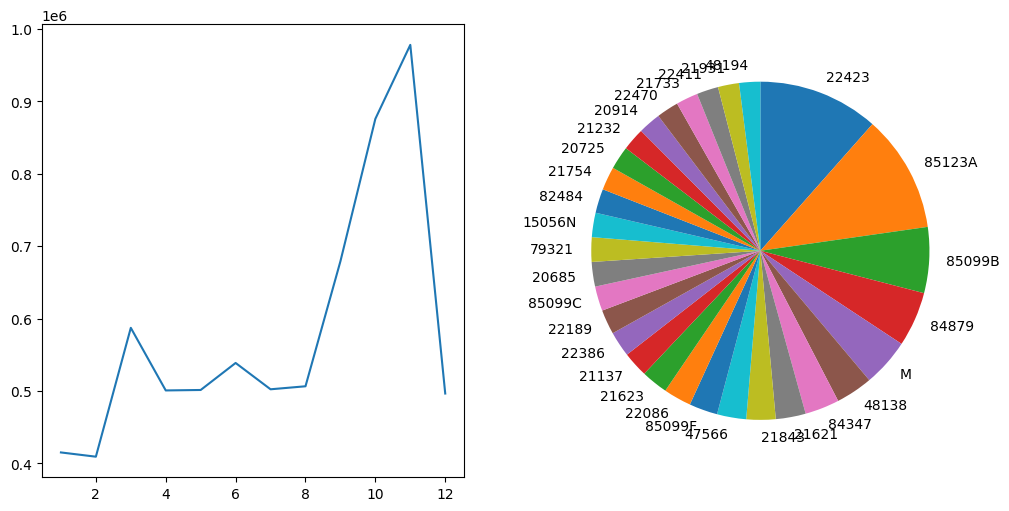

In [28]:
fig = plt.figure(figsize=(12, 6), dpi=100)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(df_month_subtotal)

ax2 = fig.add_subplot(1, 2, 2)
plt.pie(x=by_item_30, labels=by_item_30_label, startangle=90, counterclock=False)

# 課題（4）

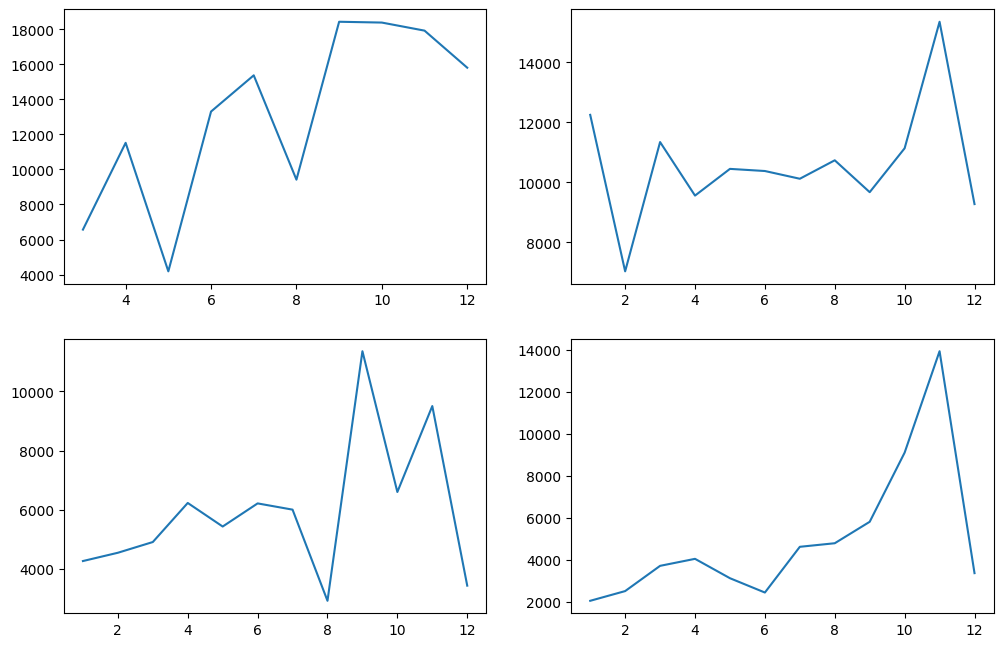

In [29]:
df_month_subtotal1 = df[df['StockCode'] == '22423'][['Subtotal']].groupby(['Month']).sum()
df_month_subtotal2 = df[df['StockCode'] == '85123A'][['Subtotal']].groupby(['Month']).sum()
df_month_subtotal3 = df[df['StockCode'] == '85099B'][['Subtotal']].groupby(['Month']).sum()
df_month_subtotal4 = df[df['StockCode'] == '84879'][['Subtotal']].groupby(['Month']).sum()

fig = plt.figure(figsize=(12, 8), dpi=100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(df_month_subtotal1)

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(df_month_subtotal2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(df_month_subtotal3)

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(df_month_subtotal4)

In [30]:
df = df.astype({'Customer ID': 'int64'})
df.dtypes

Invoice         object
StockCode       object
Quantity         int64
Price          float64
Customer ID      int64
Subtotal       float64
dtype: object

In [31]:
by_customer = df[['Customer ID', 'Subtotal']].groupby(['Customer ID']).sum().sort_values(['Subtotal'], ascending=False)
by_customer

,Subtotal
Customer ID,
18102,308158.61
13694,113070.20
16684,80716.29
17511,79413.76
15061,77443.00
...,...
15040,7.49
15913,6.30
13788,3.75


([<matplotlib.patches.Wedge at 0x13601fb80>,
 [Text(0.9443573898356699, 0.5640825473835908, '18102'),
  Text(0.7070391363487974, -0.8426717389773711, '13694'),
  Text(0.053771410300878425, -1.0986849573168165, '16684'),
  Text(-0.515302268253519, -0.97183515697508, '17511'),
  Text(-0.9332793374114865, -0.5822282012757343, '15061'),
  Text(-1.096577460327195, -0.08670567168507022, '16754'),
  Text(-1.0395422926466553, 0.3596551428784743, '13089'),
  Text(-0.8357874318785824, 0.7151638754256285, '17949'),
  Text(-0.5324399657364963, 0.9625526909663278, '17450'),
  Text(-0.18048417311611736, 1.0850923754476351, '12931')])

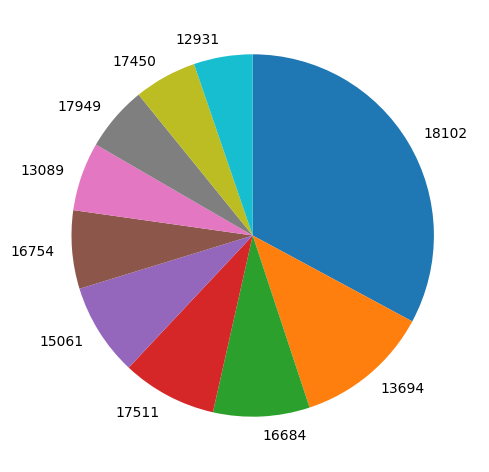

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.pie(x=by_customer.values[0:10, 0], labels=by_customer.index[0:10].values, startangle=90, counterclock=False)